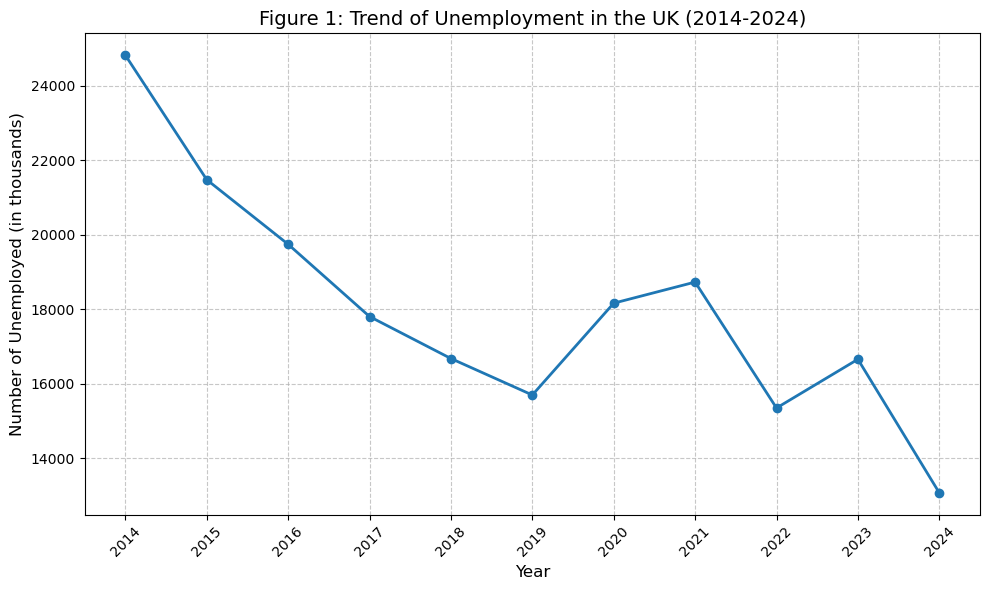

In [1]:
# Figure 1: Overall Trend of Unemployment in the UK from 2014 to 2024

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS1.csv'
data = pd.read_csv(file_path)

# Cleaning and preparing the data
data['Unemployment'] = data['Unemployment'].str.replace(',', '').astype(int)
data['Year'] = data['Year'].astype(int)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Unemployment'], marker='o', linestyle='-', linewidth=2)
plt.title('Figure 1: Trend of Unemployment in the UK (2014-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unemployed (in thousands)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(data['Year'], rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

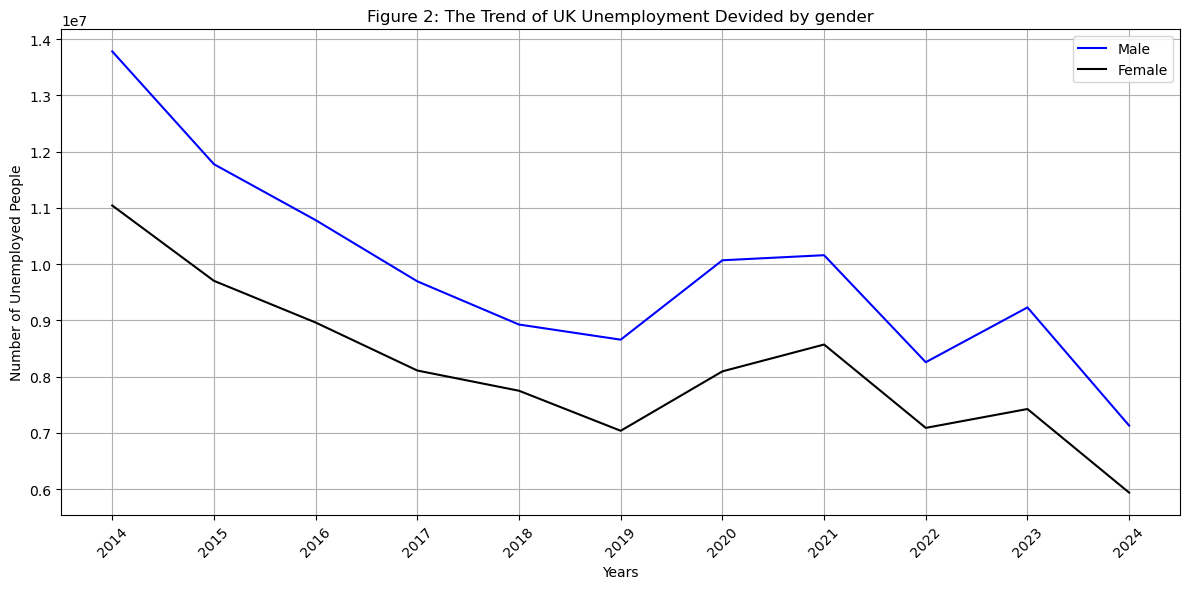

In [2]:
# Figure2: Overall Trend of Unemployment in the UK Based on Genders.

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM1.csv'
data = pd.read_csv(file_path)

# Step 2: Filter data for 'All aged 16 & over'
male_data = data[(data['Age'] == 'All aged 16 & over') & (data['Gender'] == 'Male')].iloc[0]
female_data = data[(data['Age'] == 'All aged 16 & over') & (data['Gender'] == 'Female')].iloc[0]

# Extract years and values
years = male_data.index[2:]  # Start from the 3rd column, which has the years
male_values = male_data.values[2:].astype(float)
female_values = female_data.values[2:].astype(float)

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(years, male_values, label='Male', color='blue')
plt.plot(years, female_values, label='Female', color='black')

# Step 4: Customize the chart
plt.title('Figure 2: The Trend of UK Unemployment Devided by gender')
plt.xlabel('Years')
plt.ylabel('Number of Unemployed People')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Step 5: Display the chart
plt.show()

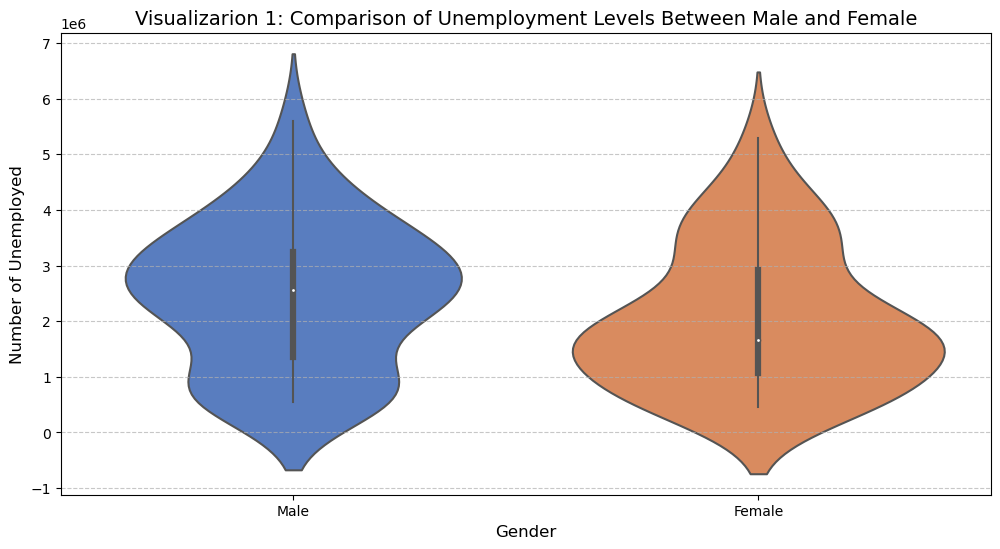

In [9]:
# Figure 3: Comparison of Unemployment Levels Between Male and Female.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM1.csv'
data = pd.read_csv(file_path)

# Reshaping and cleaning the data
data_melted = pd.melt(data, id_vars=['Age', 'Gender'], var_name='Year', value_name='Unemployment')
data_melted['Unemployment'] = data_melted['Unemployment'].astype(int)

# Filtering out unwanted age categories like 'All aged 16 & over' and 'All aged 16 to 64'
filtered_data = data_melted[~data_melted['Age'].isin(['All aged 16 & over', 'All aged 16 to 64'])]

# Plotting a violin plot to compare unemployment between male and female
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='Gender', y='Unemployment', palette='muted')
plt.title('Visualizarion 1: Comparison of Unemployment Levels Between Male and Female', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Unemployed', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

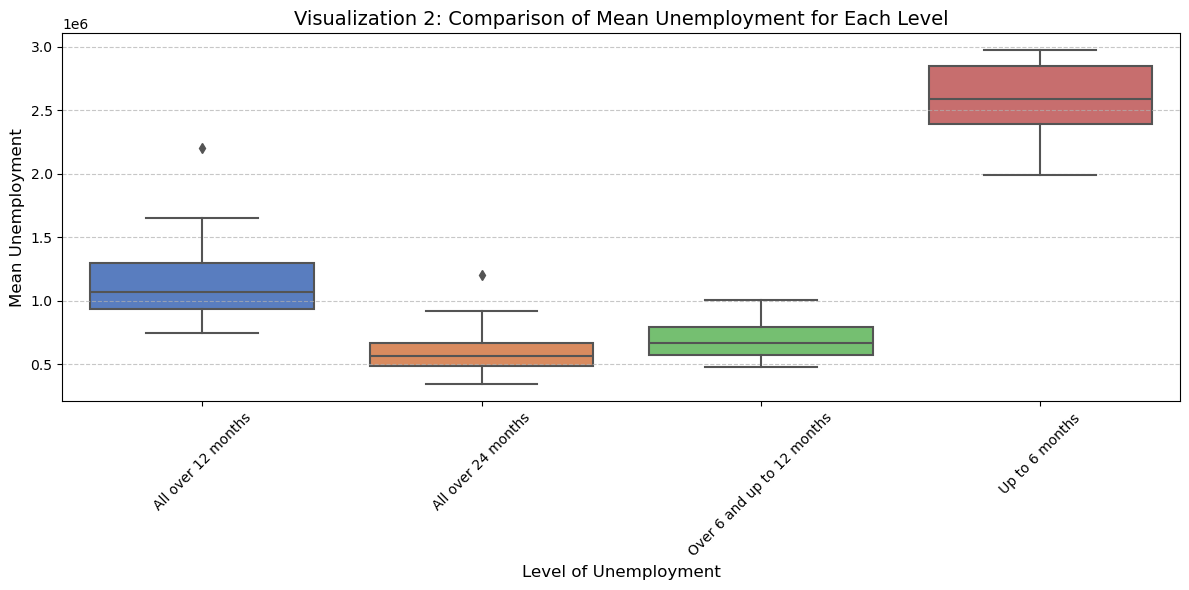

In [10]:
# Figure 4: Comparison of Mean Unemployment for Each Level

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM2.csv'
data = pd.read_csv(file_path)

# Melt the data to long format for easier manipulation
data_melted = pd.melt(
    data,
    id_vars=['Age', 'Gender', 'Level'],
    var_name='Year',
    value_name='Unemployment'
)

# Convert 'Unemployment' to numeric type
data_melted['Unemployment'] = data_melted['Unemployment'].astype(int)

# Combine male and female data by grouping over Level
combined_data = data_melted.groupby(['Level', 'Year'])['Unemployment'].mean().reset_index()

# Plot: Box plot to compare mean unemployment for each level
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Level', y='Unemployment', palette='muted')
plt.title('Visualization 2: Comparison of Mean Unemployment for Each Level', fontsize=14)
plt.xlabel('Level of Unemployment', fontsize=12)
plt.ylabel('Mean Unemployment', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

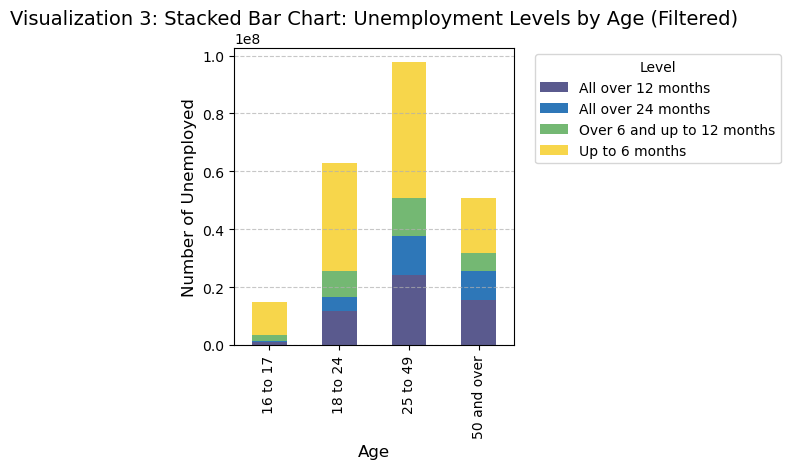

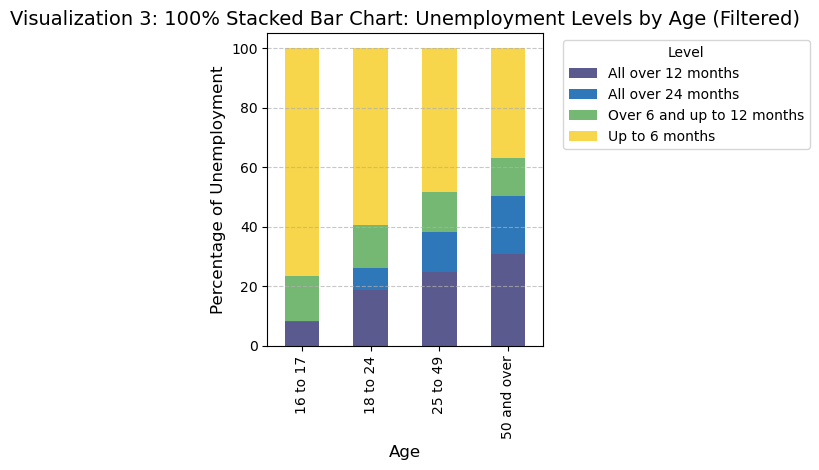

In [11]:
# Figure 5: Stacked Bar Chart: Unemployment Levels by Age (Filtered)

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS3.csv'
data = pd.read_csv(file_path)

# Reshaping and cleaning the data
data_melted = pd.melt(data, id_vars=['Age', 'Level'], var_name='Year', value_name='Unemployment')
data_melted['Year'] = data_melted['Year'].astype(int)
data_melted['Unemployment'] = data_melted['Unemployment'].astype(int)

# Filtering out unwanted age groups
filtered_data = data_melted[~data_melted['Age'].isin(['All aged 16 & over', 'All aged 16 to 64'])]

# Grouping the filtered data by age and level
grouped_data_filtered_by_age = filtered_data.groupby(['Age', 'Level'])['Unemployment'].sum().unstack()

# Preparing data for 100% stacked bar plots by age
stacked_data_filtered_by_age = grouped_data_filtered_by_age.div(grouped_data_filtered_by_age.sum(axis=1), axis=0) * 100

# Custom color palette similar to the desired chart
custom_colors = {
    'All over 12 months': '#5A5A8E',  # Dark purple
    'All over 24 months': '#2E77B8',  # Blue
    'Over 6 and up to 12 months': '#74B873',  # Green
    'Up to 6 months': '#F7D64B'  # Yellow
}

# Plotting Stacked Bar Chart by Age (filtered) with consistent colors
plt.figure(figsize=(12, 6))
grouped_data_filtered_by_age.plot(
    kind='bar', 
    stacked=True, 
    color=[custom_colors[col] for col in grouped_data_filtered_by_age.columns]
)
plt.title('Visualization 3: Stacked Bar Chart: Unemployment Levels by Age (Filtered)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Unemployed', fontsize=12)
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting 100% Stacked Bar Chart by Age (filtered) with consistent colors
stacked_data_filtered_by_age.plot(
    kind='bar', 
    stacked=True, 
    color=[custom_colors[col] for col in stacked_data_filtered_by_age.columns]
)
plt.title('Visualization 3: 100% Stacked Bar Chart: Unemployment Levels by Age (Filtered)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage of Unemployment', fontsize=12)
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
import pandas as pd
import plotly.graph_objects as go
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc

# Initialize the Dash app with a Bootstrap theme
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# ---------------------------------------------------
# Chart 1: Overall Trend of Unemployment in the UK
file_path1 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS1.csv'
data1 = pd.read_csv(file_path1)
data1['Unemployment'] = data1['Unemployment'].str.replace(',', '').astype(int)
data1['Year'] = data1['Year'].astype(int)

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data1['Year'], y=data1['Unemployment'], mode='lines+markers', name='Unemployment'))
fig1.update_layout(
    title='Figure 1: Trend of Unemployment in the UK (2014-2024)',
    xaxis_title='Year',
    yaxis_title='Number of Unemployed (in thousands)',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 2: Trend of Unemployment by Gender
file_path2 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM1.csv'
data2 = pd.read_csv(file_path2)

male_data = data2[(data2['Age'] == 'All aged 16 & over') & (data2['Gender'] == 'Male')].iloc[0]
female_data = data2[(data2['Age'] == 'All aged 16 & over') & (data2['Gender'] == 'Female')].iloc[0]

years = male_data.index[2:]
male_values = male_data.values[2:].astype(float)
female_values = female_data.values[2:].astype(float)

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=years, y=male_values, mode='lines+markers', name='Male', line=dict(color='blue')))
fig2.add_trace(go.Scatter(x=years, y=female_values, mode='lines+markers', name='Female', line=dict(color='black')))
fig2.update_layout(
    title='Figure 2: The Trend of UK Unemployment Divided by Gender',
    xaxis_title='Years',
    yaxis_title='Number of Unemployed People',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 3: Violin Plot of Unemployment Levels
data3_melted = pd.melt(data2, id_vars=['Age', 'Gender'], var_name='Year', value_name='Unemployment')
data3_melted['Unemployment'] = data3_melted['Unemployment'].astype(int)
filtered_data3 = data3_melted[~data3_melted['Age'].isin(['All aged 16 & over', 'All aged 16 to 64'])]

fig3 = go.Figure()
fig3.add_trace(go.Violin(x=filtered_data3['Gender'], y=filtered_data3['Unemployment'], box_visible=True, 
                         points='all', meanline_visible=True))
fig3.update_layout(
    title='Figure 3: Comparison of Unemployment Levels Between Male and Female',
    xaxis_title='Gender',
    yaxis_title='Number of Unemployed',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 4: Box Plot of Mean Unemployment Levels
file_path4 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM2.csv'
data4 = pd.read_csv(file_path4)
data4_melted = pd.melt(data4, id_vars=['Age', 'Gender', 'Level'], var_name='Year', value_name='Unemployment')
data4_melted['Unemployment'] = data4_melted['Unemployment'].astype(int)
combined_data4 = data4_melted.groupby(['Level', 'Year'])['Unemployment'].mean().reset_index()

fig4 = go.Figure()
for level in combined_data4['Level'].unique():
    filtered = combined_data4[combined_data4['Level'] == level]
    fig4.add_trace(go.Box(y=filtered['Unemployment'], name=level))
fig4.update_layout(
    title='Figure 4: Comparison of Mean Unemployment for Each Level',
    xaxis_title='Level of Unemployment',
    yaxis_title='Mean Unemployment',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 5: Stacked Bar Chart of Unemployment Levels by Age
file_path5 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS3.csv'
data5 = pd.read_csv(file_path5)
data5_melted = pd.melt(data5, id_vars=['Age', 'Level'], var_name='Year', value_name='Unemployment')
data5_melted['Unemployment'] = data5_melted['Unemployment'].astype(int)

# Grouping the Data
grouped_data5 = data5_melted.groupby(['Age', 'Level'])['Unemployment'].sum().unstack()

# Calculate 100% Stacked Data
grouped_data5_percentage = grouped_data5.div(grouped_data5.sum(axis=1), axis=0) * 100

# Define Custom Colors Matching Your Image
custom_colors = {
    'All over 12 months': '#5A5A8E',   # Dark Purple
    'All over 24 months': '#2E77B8',   # Blue
    'Over 6 and up to 12 months': '#74B873',  # Green
    'Up to 6 months': '#F7D64B'        # Yellow
}

# Create Regular Stacked Bar Chart
fig5 = go.Figure()
for col in grouped_data5.columns:
    fig5.add_trace(go.Bar(
        x=grouped_data5.index,
        y=grouped_data5[col],
        name=col,
        marker_color=custom_colors[col]
    ))

fig5.update_layout(
    title='Figure 5: Stacked Bar Chart: Unemployment Levels by Age',
    xaxis_title='Age Group',
    yaxis_title='Number of Unemployed',
    barmode='stack',
    template='plotly_white',
    legend_title='Level'
)

# Create 100% Stacked Bar Chart
fig6 = go.Figure()
for col in grouped_data5_percentage.columns:
    fig6.add_trace(go.Bar(
        x=grouped_data5_percentage.index,
        y=grouped_data5_percentage[col],
        name=col,
        marker_color=custom_colors[col]
    ))

fig6.update_layout(
    title='Figure 6: 100% Stacked Bar Chart: Unemployment Levels by Age',
    xaxis_title='Age Group',
    yaxis_title='Percentage of Unemployment',
    barmode='stack',
    template='plotly_white',
    legend_title='Level'
)

# Display Both Charts Side-by-Side
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc

# Initialize the Dash App
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("UK Unemployment Analysis Dashboard", className="mb-4 text-center"), width=12)
    ]),
    
    # Regular Stacked Bar Chart
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig5), width=6),
        dbc.Col(dcc.Graph(figure=fig6), width=6),
    ], className="mb-4"),
    
], fluid=True)

# ---------------------------------------------------
# Layout of the Dashboard
try:
    # Code that might raise an exception
    result = 10 / 0  # Example of an error (division by zero)
except Exception as e:  # Correct syntax
    print(f"An error occurred: {e}")
# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

    # Layout
app.layout = dbc.Container([
        dbc.Row([
            dbc.Col(html.H1("Dashboard for Visualizing Data", className="text-center mb-4"), width=12)
        ]),
        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig1), width=6),
            dbc.Col(dcc.Graph(figure=fig2), width=6),
            dbc.Col(dcc.Graph(figure=fig3), width=6),
            dbc.Col(dcc.Graph(figure=fig4), width=6),
            dbc.Col(dcc.Graph(figure=fig5), width=6),
            dbc.Col(dcc.Graph(figure=fig6), width=6)
        ]),
    ], fluid=True)

    # Run the app
# Run the app
if __name__ == '__main__':
    app.run(jupyter_mode="external", debug=True)

An error occurred: division by zero
Dash app running on http://127.0.0.1:8050/
